***Step 1 - Import, Read, Understand & Visualize the Data***






In [2]:
#import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score


In [3]:
#import the csv file day

df = pd.read_csv('day.csv')

# Print the first few rows of the dataframe to verify it loaded correctly.
print(df.head())


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [4]:
#print the shape of the dataset

print(df.shape)


(730, 16)


In [5]:
#print the information of the dataset

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


In [6]:
#describe the dataset
print(df.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.5448

In [7]:
#convert such feature values into categorical string values - season (1:spring, 2:summer, 3:fall, 4:winter)

df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

#print the first few rows of the dataframe to verify it loaded correctly.
print(df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018  spring   0     1        0        6           0   
1        2  02-01-2018  spring   0     1        0        0           0   
2        3  03-01-2018  spring   0     1        0        1           1   
3        4  04-01-2018  spring   0     1        0        2           1   
4        5  05-01-2018  spring   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [8]:
#convert such feature values into categorical string values - weathersit (1:Clear, 2:Misty, 3:Wet, 4:Bad)
df['weathersit'] = df['weathersit'].map({1: 'Clear', 2: 'Misty', 3: 'Wet', 4: 'Bad'})

#print the first few rows of the dataframe to verify it loaded correctly.
print(df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018  spring   0     1        0        6           0   
1        2  02-01-2018  spring   0     1        0        0           0   
2        3  03-01-2018  spring   0     1        0        1           1   
3        4  04-01-2018  spring   0     1        0        2           1   
4        5  05-01-2018  spring   0     1        0        3           1   

  weathersit       temp     atemp      hum  windspeed  casual  registered  \
0      Misty  14.110847  18.18125  80.5833  10.749882     331         654   
1      Misty  14.902598  17.68695  69.6087  16.652113     131         670   
2      Clear   8.050924   9.47025  43.7273  16.636703     120        1229   
3      Clear   8.200000  10.60610  59.0435  10.739832     108        1454   
4      Clear   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [9]:
#convert such feature values into categorical string values - weekday (0:sunday, 1:monday, 2:tuesday, 3:wednesday, 4:Thursday, 5:Friday, 6:Saturday)

df['weekday'] = df['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

#print the first few rows of the dataframe to verify it loaded correctly.
print(df.head())


   instant      dteday  season  yr  mnth  holiday    weekday  workingday  \
0        1  01-01-2018  spring   0     1        0   Saturday           0   
1        2  02-01-2018  spring   0     1        0     Sunday           0   
2        3  03-01-2018  spring   0     1        0     Monday           1   
3        4  04-01-2018  spring   0     1        0    Tuesday           1   
4        5  05-01-2018  spring   0     1        0  Wednesday           1   

  weathersit       temp     atemp      hum  windspeed  casual  registered  \
0      Misty  14.110847  18.18125  80.5833  10.749882     331         654   
1      Misty  14.902598  17.68695  69.6087  16.652113     131         670   
2      Clear   8.050924   9.47025  43.7273  16.636703     120        1229   
3      Clear   8.200000  10.60610  59.0435  10.739832     108        1454   
4      Clear   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [10]:
#convert such feature values into categorical string values - mnth(1:jan, 2:feb,  3:mar, 4:apr, 5:may, 6:jun, 7:jul, 8:aug, 9:sep, 10:oct, 11:nov, 12:dec)
month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
df['mnth'] = df['mnth'].map(month_mapping)

#print the first few rows of the dataframe to verify it loaded correctly.
print(df.head())


   instant      dteday  season  yr mnth  holiday    weekday  workingday  \
0        1  01-01-2018  spring   0  Jan        0   Saturday           0   
1        2  02-01-2018  spring   0  Jan        0     Sunday           0   
2        3  03-01-2018  spring   0  Jan        0     Monday           1   
3        4  04-01-2018  spring   0  Jan        0    Tuesday           1   
4        5  05-01-2018  spring   0  Jan        0  Wednesday           1   

  weathersit       temp     atemp      hum  windspeed  casual  registered  \
0      Misty  14.110847  18.18125  80.5833  10.749882     331         654   
1      Misty  14.902598  17.68695  69.6087  16.652113     131         670   
2      Clear   8.050924   9.47025  43.7273  16.636703     120        1229   
3      Clear   8.200000  10.60610  59.0435  10.739832     108        1454   
4      Clear   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


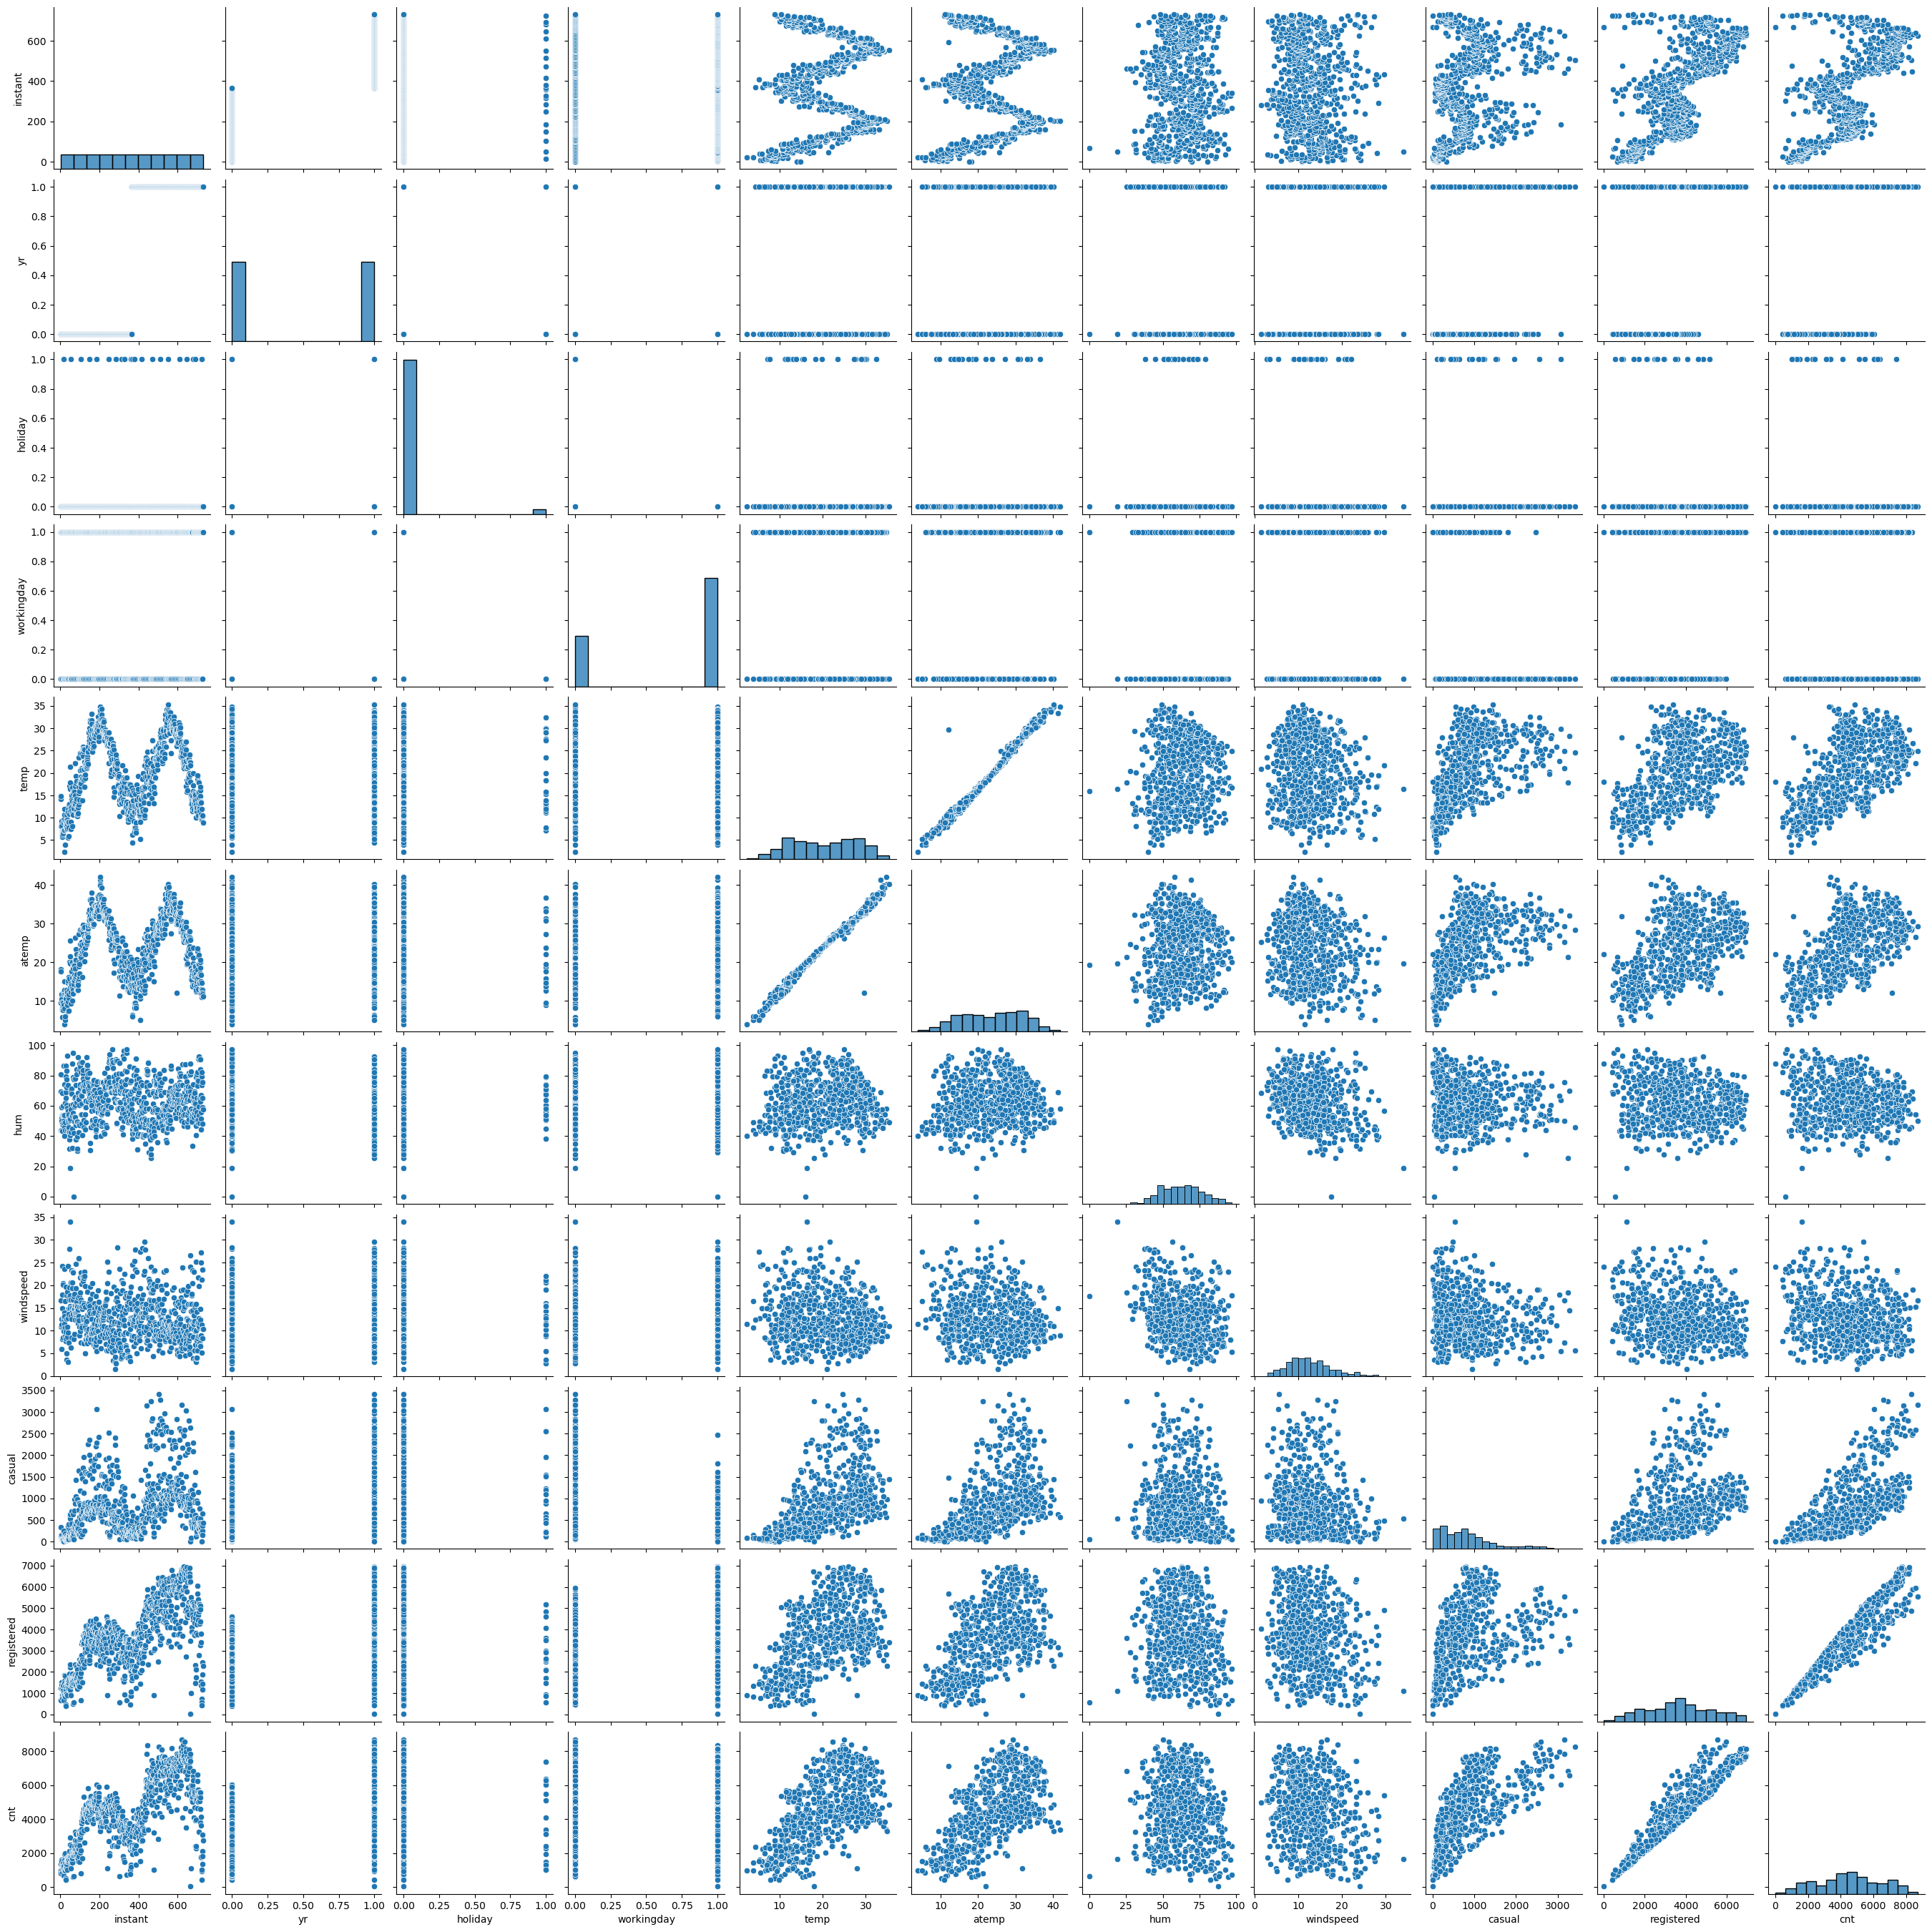

In [11]:
#visualize the dataset - create a pairplot using the dataset - numerical variables

sns.pairplot(df)
plt.show()

In [12]:
#List all the categorical variables present in the dataset

categorical_variables = ['season', 'holiday', 'workingday', 'weathersit']


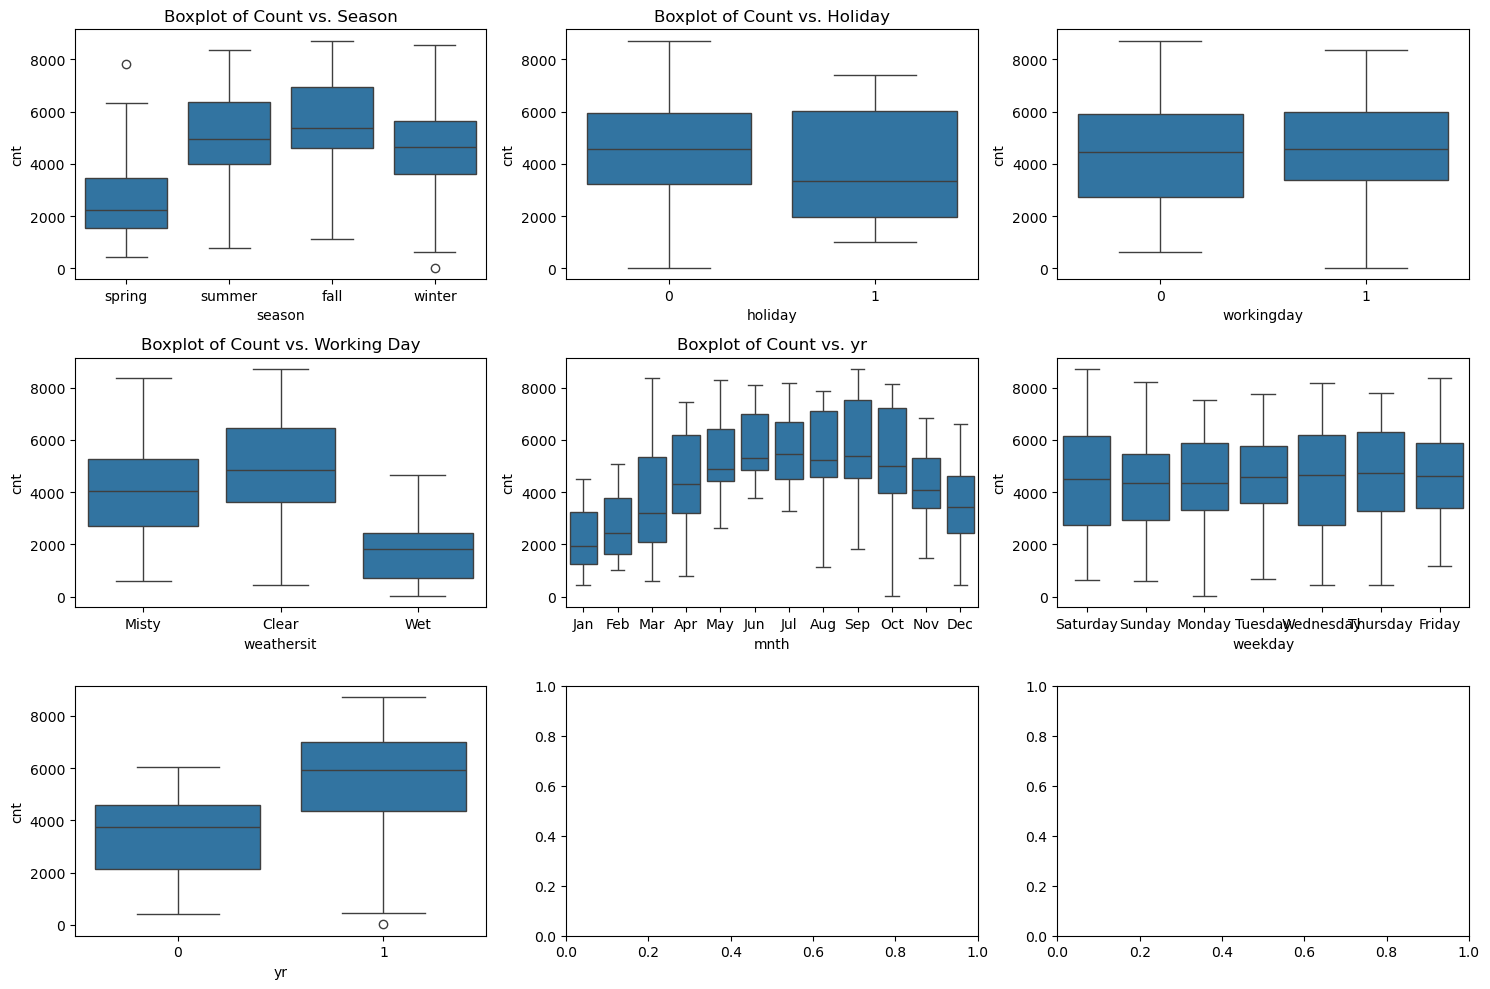

In [13]:
# prompt: #visualize the dataset - create a boxplot & subplots using the dataset - categorical variables

fig, axes = plt.subplots(3, 3, figsize=(15, 10))

sns.boxplot(x='season', y='cnt', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of Count vs. Season')

sns.boxplot(x='holiday', y='cnt', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Count vs. Holiday')

sns.boxplot(x='workingday', y='cnt', data=df, ax=axes[0, 2])
axes[1, 0].set_title('Boxplot of Count vs. Working Day')

sns.boxplot(x='weathersit', y='cnt', data=df, ax=axes[1, 0])
axes[1, 1].set_title('Boxplot of Count vs. Weather Situation')

sns.boxplot(x='mnth', y='cnt', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of Count vs. mnth')

sns.boxplot(x='weekday', y='cnt', data=df, ax=axes[1, 2])
axes[1, 1].set_title('Boxplot of Count vs. weekday')

sns.boxplot(x='yr', y='cnt', data=df, ax=axes[2, 0])
axes[1, 1].set_title('Boxplot of Count vs. yr')


plt.tight_layout()
plt.show()


***Step 2 - Preparing the Data for Modelling***

In [15]:
#Create Dummy variables for season

season_dummies = pd.get_dummies(df['season'],drop_first=True ).astype(int)
season_dummies.head()


,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [16]:
#Create Dummy variables for mnth

mnth_dummies = pd.get_dummies(df['mnth'],drop_first=True ).astype(int)
mnth_dummies.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [17]:
#Create Dummy variables for weathersit

weathersit_dummies = pd.get_dummies(df['weathersit'],drop_first=True ).astype(int)
weathersit_dummies.head()

,Misty,Wet
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [18]:
#Create Dummy variables for weekday

weekday_dummies = pd.get_dummies(df['weekday'],drop_first=True ).astype(int)
weekday_dummies.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [19]:
#Concat the dummies with original dataset
df=pd.concat([df, season_dummies, mnth_dummies, weathersit_dummies, weekday_dummies], axis=1)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,Oct,Sep,Misty,Wet,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,01-01-2018,spring,0,Jan,0,Saturday,0,Misty,14.110847,...,0,0,1,0,0,1,0,0,0,0
1,2,02-01-2018,spring,0,Jan,0,Sunday,0,Misty,14.902598,...,0,0,1,0,0,0,1,0,0,0
2,3,03-01-2018,spring,0,Jan,0,Monday,1,Clear,8.050924,...,0,0,0,0,1,0,0,0,0,0
3,4,04-01-2018,spring,0,Jan,0,Tuesday,1,Clear,8.200000,...,0,0,0,0,0,0,0,0,1,0
4,5,05-01-2018,spring,0,Jan,0,Wednesday,1,Clear,9.305237,...,0,0,0,0,0,0,0,0,0,1


In [20]:
#Drop Reduntant variables
df=df.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1)
df.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,Oct,Sep,Misty,Wet,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,01-01-2018,0,0,0,14.110847,18.18125,80.5833,10.749882,331,...,0,0,1,0,0,1,0,0,0,0
1,2,02-01-2018,0,0,0,14.902598,17.68695,69.6087,16.652113,131,...,0,0,1,0,0,0,1,0,0,0
2,3,03-01-2018,0,0,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,1,0,0,0,0,0
3,4,04-01-2018,0,0,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,0,0,0,1,0
4,5,05-01-2018,0,0,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,0,0,0,1


Splitting into Train & Test

In [22]:
#Drop unnecessary columns - instant, dteday, causl, regitered

df = df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)
df.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Misty,Wet,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
#Split the dataset into Train & Test

df_train, df_test = train_test_split(df,train_size = 0.7, random_state = 100)

print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [24]:
#Rescale numerical values temp, atemp, hum, windspeed, cnt using MinMaxScaler in dataset df_train

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Define the numerical features to rescale
num_variables = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Fit the scaler on the training data and transform both the training and test data
df_train[num_variables] = scaler.fit_transform(df_train[num_variables])

print(df_train.head())


     yr  holiday  workingday      temp     atemp       hum  windspeed  \
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           0  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   
111   0        0           1  0.345824  0.318819  0.751824   0.380981   

          cnt  spring  summer  ...  Oct  Sep  Misty  Wet  Monday  Saturday  \
576  0.827658       0       0  ...    0    0      0    0       0         0   
426  0.465255       1       0  ...    0    0      1    0       0         1   
728  0.204096       1       0  ...    0    0      0    0       0         0   
482  0.482973       0       1  ...    0    0      1    0       0         1   
111  0.191095       0       1  ...    0    0      1    0       0         0   

     Sunday  Thursday  Tuesday  Wednesday  
576       0         0        1          0  
426 

In [25]:
#Describe after rescaling

print(df_train[num_variables].describe())

             temp       atemp         hum   windspeed         cnt
count  510.000000  510.000000  510.000000  510.000000  510.000000
mean     0.537440    0.513156    0.650480    0.320883    0.513499
std      0.225858    0.212410    0.145846    0.169803    0.224421
min      0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.339853    0.332086    0.538643    0.199179    0.356420
50%      0.542596    0.529718    0.653714    0.296763    0.518638
75%      0.735215    0.688457    0.754830    0.414447    0.684710
max      1.000000    1.000000    1.000000    1.000000    1.000000


***Step 3 - Training the Model***

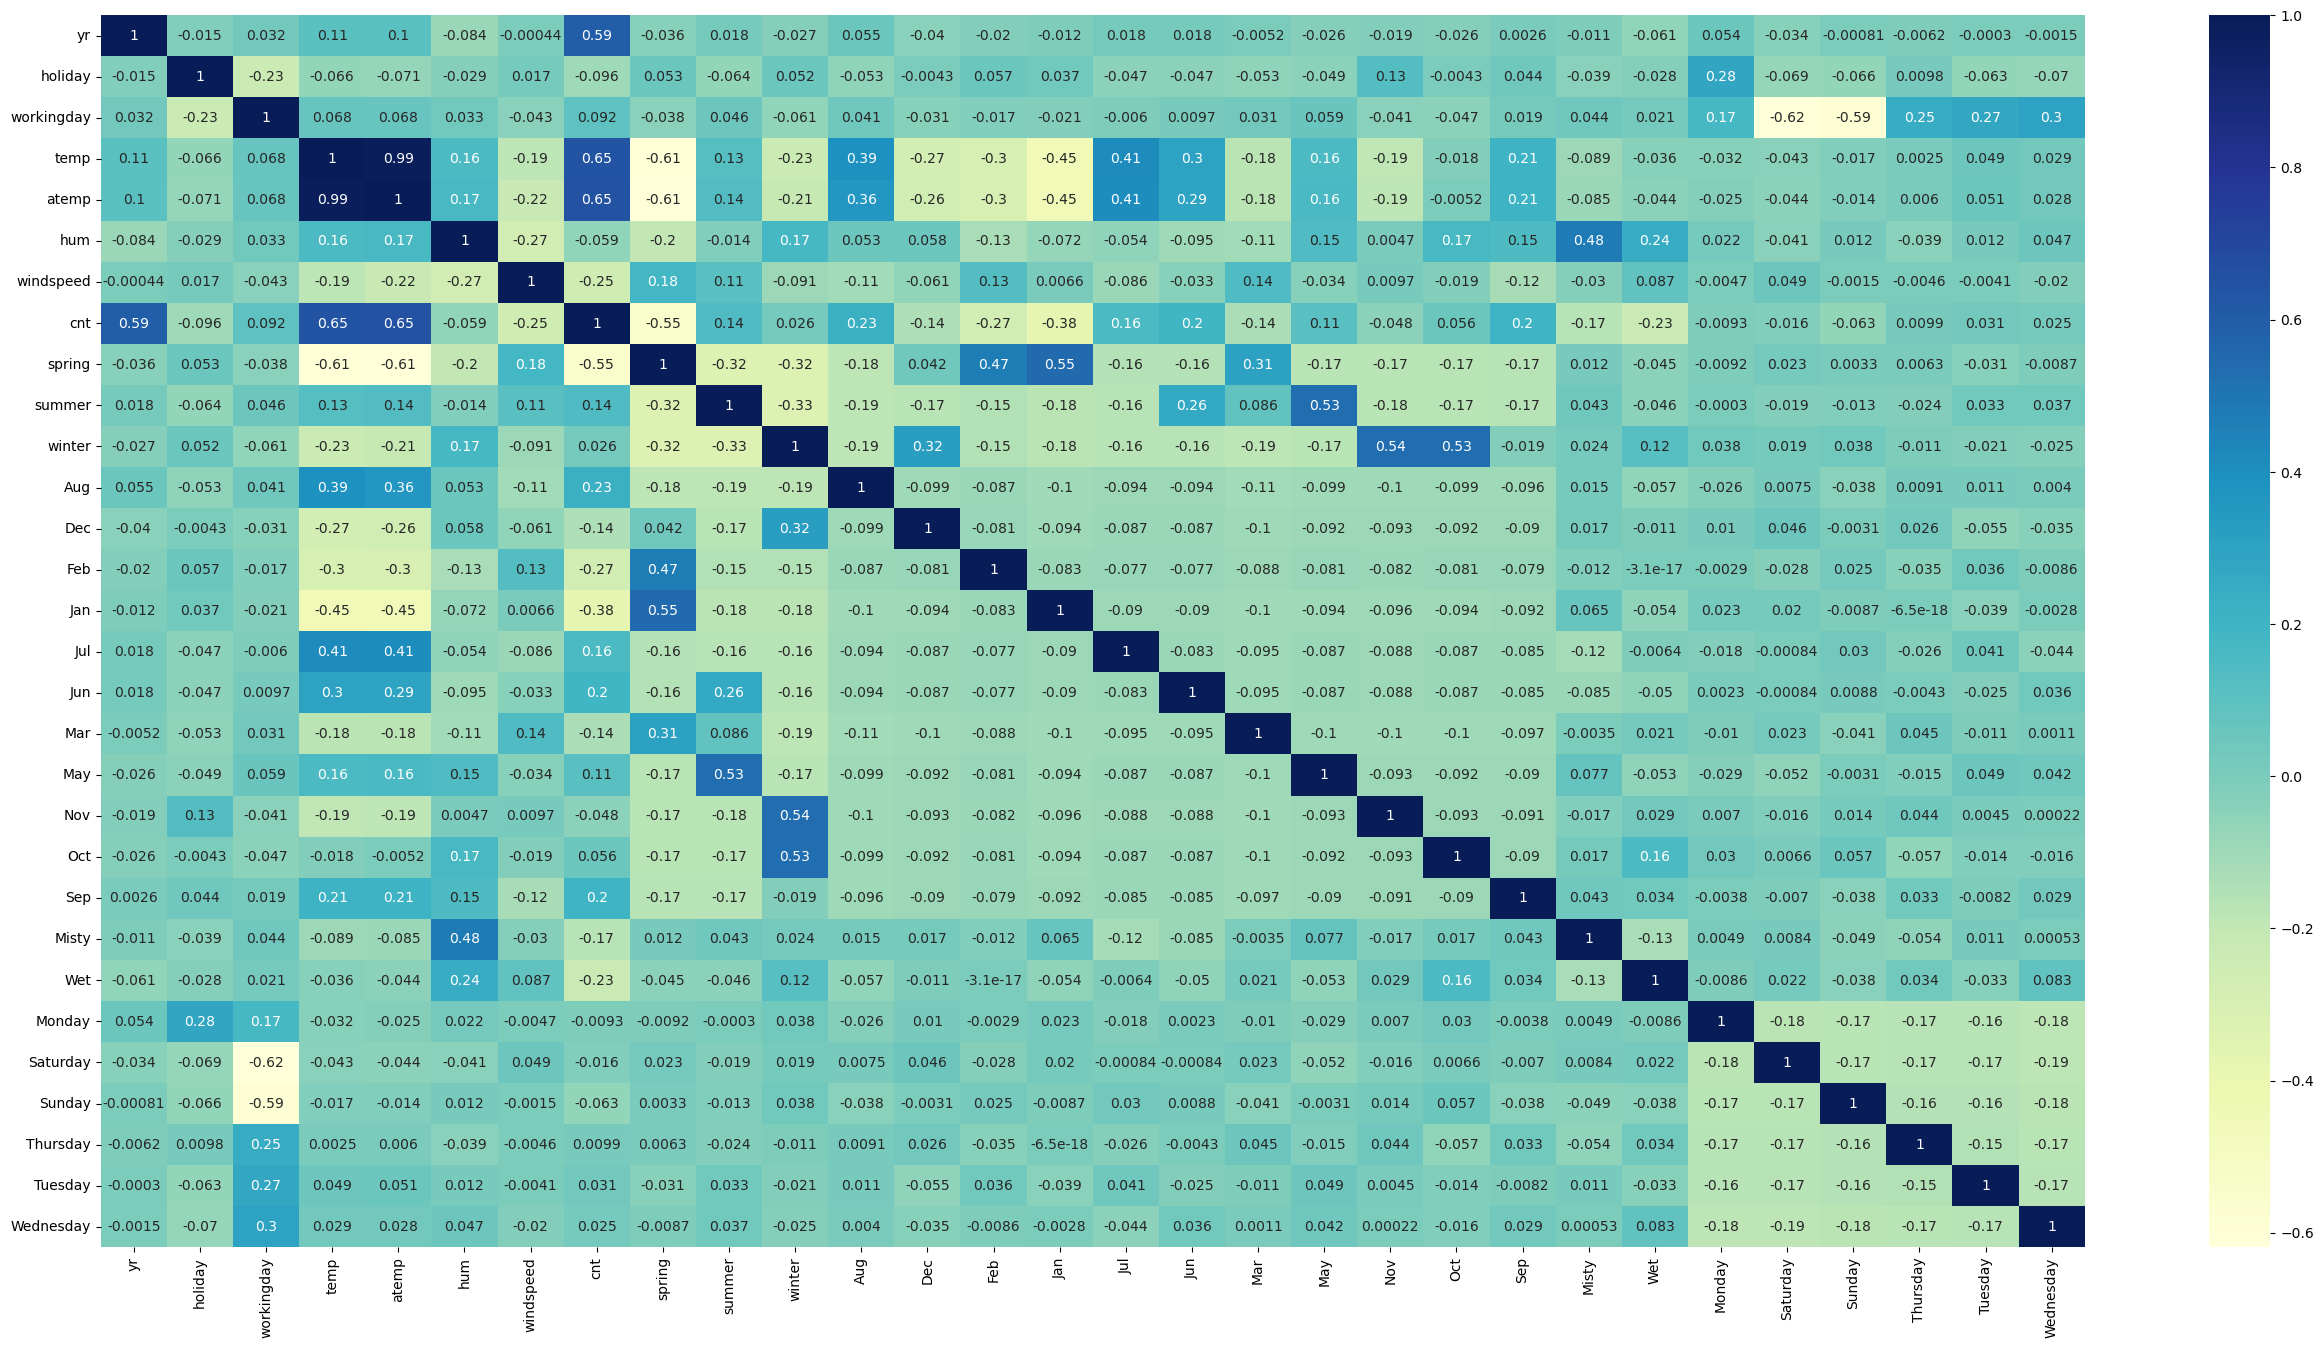

In [27]:
#Plot a heat map between all variables in df_train

plt.figure(figsize=(32, 16))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')
plt.show()


Residual Analysis and Predictions

In [29]:
#Check for columns
print(df_train.columns)

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul',
       'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Misty', 'Wet', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')


Recursive Feature Elimination - Build a model with 20 variables

In [31]:
#Create x-train and y-train
X_train = df_train.drop('cnt', axis=1)
y_train = df_train['cnt']

print(X_train.shape)
print(y_train.shape)

(510, 29)
(510,)


In [32]:
# Build the linear regression model
lr = LinearRegression()

# Perform RFE to select the best features
rfe = RFE(lr, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

# Print the selected features
print(list(X_train.columns[rfe.support_]))

# Build the model with selected features
X_train_rfe = X_train[X_train.columns[rfe.support_]]
lr.fit(X_train_rfe, y_train)

['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'spring', 'summer', 'winter', 'Dec', 'Feb', 'Jan', 'Jul', 'May', 'Nov', 'Sep', 'Misty', 'Wet', 'Saturday']


LinearRegression()

In [33]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 2),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 9),
 ('Mar', False, 10),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', False, 8),
 ('Sep', True, 1),
 ('Misty', True, 1),
 ('Wet', True, 1),
 ('Monday', False, 4),
 ('Saturday', True, 1),
 ('Sunday', False, 3),
 ('Thursday', False, 6),
 ('Tuesday', False, 5),
 ('Wednesday', False, 7)]

#Build a regression model with all features

In [35]:
#Build a model with all variables
X_train_sm = sm.add_constant(X_train_rfe)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr = lr.fit()

In [36]:
#params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.3
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          6.28e-188
Time:                        10:33:20   Log-Likelihood:                 525.41
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     489   BIC:                            -919.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2973      0.039      7.717      0.0

In [37]:
#Create a function to calculate VIF including function call

def calculate_vif(X):

  vif = pd.DataFrame()
  vif["Features"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return vif

In [38]:
#Calculate VIF for X_train_rfe
calculate_vif(X_train_rfe)

,Features,VIF
0,yr,2.106930
1,holiday,1.209154
2,workingday,5.396640
3,temp,379.771734
4,atemp,368.952842
5,hum,31.790607
6,windspeed,5.128634
7,spring,5.732790
8,summer,3.588994
9,winter,4.276495


In [40]:
#Drop columns - 'workingday','hum','May','Saturday','Feb','summer' - Done Iteratively comparing p-value and high VIF - In 6 steps

X_train_new  = X_train_rfe.drop(['workingday','hum','May','Saturday','Feb','summer'], axis=1)

#Build a model with all variables
X_train_sm = sm.add_constant(X_train_new)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr = lr.fit()

#params
print(lr.summary())

# Calculate VIF for X_train_new
calculate_vif(X_train_new)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.3
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          5.38e-185
Time:                        10:33:21   Log-Likelihood:                 502.34
No. Observations:                 510   AIC:                            -974.7
Df Residuals:                     495   BIC:                            -911.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2883      0.026     11.230      0.0

,Features,VIF
0,yr,2.063753
1,holiday,1.060824
2,temp,351.359003
3,atemp,344.317172
4,windspeed,4.129327
5,spring,2.389078
6,winter,2.618311
7,Dec,1.465460
8,Jan,1.648106
9,Jul,1.359618


In [41]:
#Calculate y_train_pred for the model lr

y_train_pred = lr.predict(X_train_sm)

Evaluate using test set

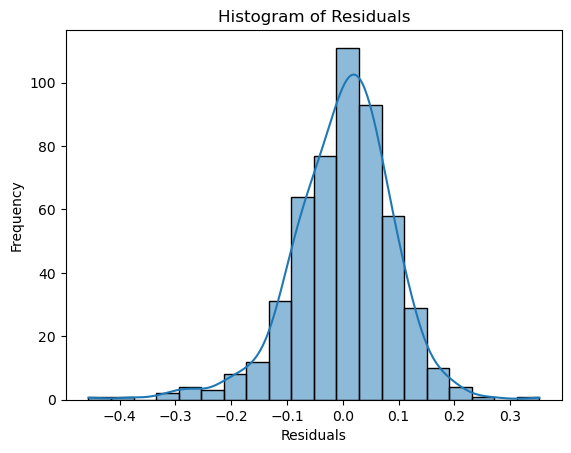

In [43]:
# Assuming you have your model predictions in 'y_pred' and actual target values in 'y_true'
residuals = y_train - y_train_pred

# Plot the histogram of residuals
sns.histplot(residuals, kde=True, bins= 20)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [44]:
# Fit the scaler on the training data and transform both the training and test data
df_test[num_variables] = scaler.transform(df_test[num_variables])

print(df_test.head())

     yr  holiday  workingday      temp     atemp       hum  windspeed  \
184   0        1           0  0.831783  0.769660  0.657364   0.084219   
535   1        0           1  0.901354  0.842587  0.610133   0.153728   
299   0        0           1  0.511964  0.496145  0.837699   0.334206   
221   0        0           1  0.881625  0.795343  0.437098   0.339570   
152   0        0           1  0.817246  0.741471  0.314298   0.537414   

          cnt  spring  summer  ...  Oct  Sep  Misty  Wet  Monday  Saturday  \
184  0.692706       0       0  ...    0    0      1    0       1         0   
535  0.712034       0       1  ...    0    0      0    0       0         0   
299  0.303382       0       0  ...    1    0      1    0       0         0   
221  0.547400       0       0  ...    0    0      0    0       0         0   
152  0.569029       0       1  ...    0    0      0    0       0         0   

     Sunday  Thursday  Tuesday  Wednesday  
184       0         0        0          0  
535 

In [45]:
#Describe df_test
print(df_test.describe())

               yr     holiday  workingday        temp       atemp         hum  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.481818    0.036364    0.700000    0.558718    0.532847    0.638221   
std      0.500809    0.187620    0.459303    0.233187    0.217401    0.148694   
min      0.000000    0.000000    0.000000    0.046591    0.025950    0.261915   
25%      0.000000    0.000000    0.000000    0.355429    0.344870    0.529197   
50%      0.000000    0.000000    1.000000    0.558172    0.544652    0.625590   
75%      1.000000    0.000000    1.000000    0.755981    0.713308    0.743798   
max      1.000000    1.000000    1.000000    0.984424    0.980934    1.002146   

        windspeed         cnt      spring      summer  ...         Oct  \
count  220.000000  220.000000  220.000000  220.000000  ...  220.000000   
mean     0.313293    0.522154    0.254545    0.263636  ...    0.086364   
std      0.159584    0.219163    0.436599    0.4

In [46]:
#Predict with y_test using the above model

# Create x_test and y_test
X_test = df_test.drop('cnt', axis=1)
y_test = df_test['cnt']

# Use the selected features from RFE for testing
X_test_new = X_test[X_train_new.columns]


# Add a constant to X_test_new
X_test_sm = sm.add_constant(X_test_new)


# Predict using the model
y_pred = lr.predict(X_test_sm)

# Print the predictions
print(y_pred)


184    0.374665
535    0.862810
299    0.426408
221    0.590006
152    0.534449
         ...   
702    0.702900
127    0.514771
640    0.796503
72     0.287523
653    0.745885
Length: 220, dtype: float64


In [47]:
#Calculate the R2 score

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


R2 Score: 0.8171924372528718


In [48]:
#Calculate the adjusted R2 score

n = len(X_test)
p = X_test_new.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R2 Score:", adjusted_r2)


Adjusted R2 Score: 0.8047080183335558


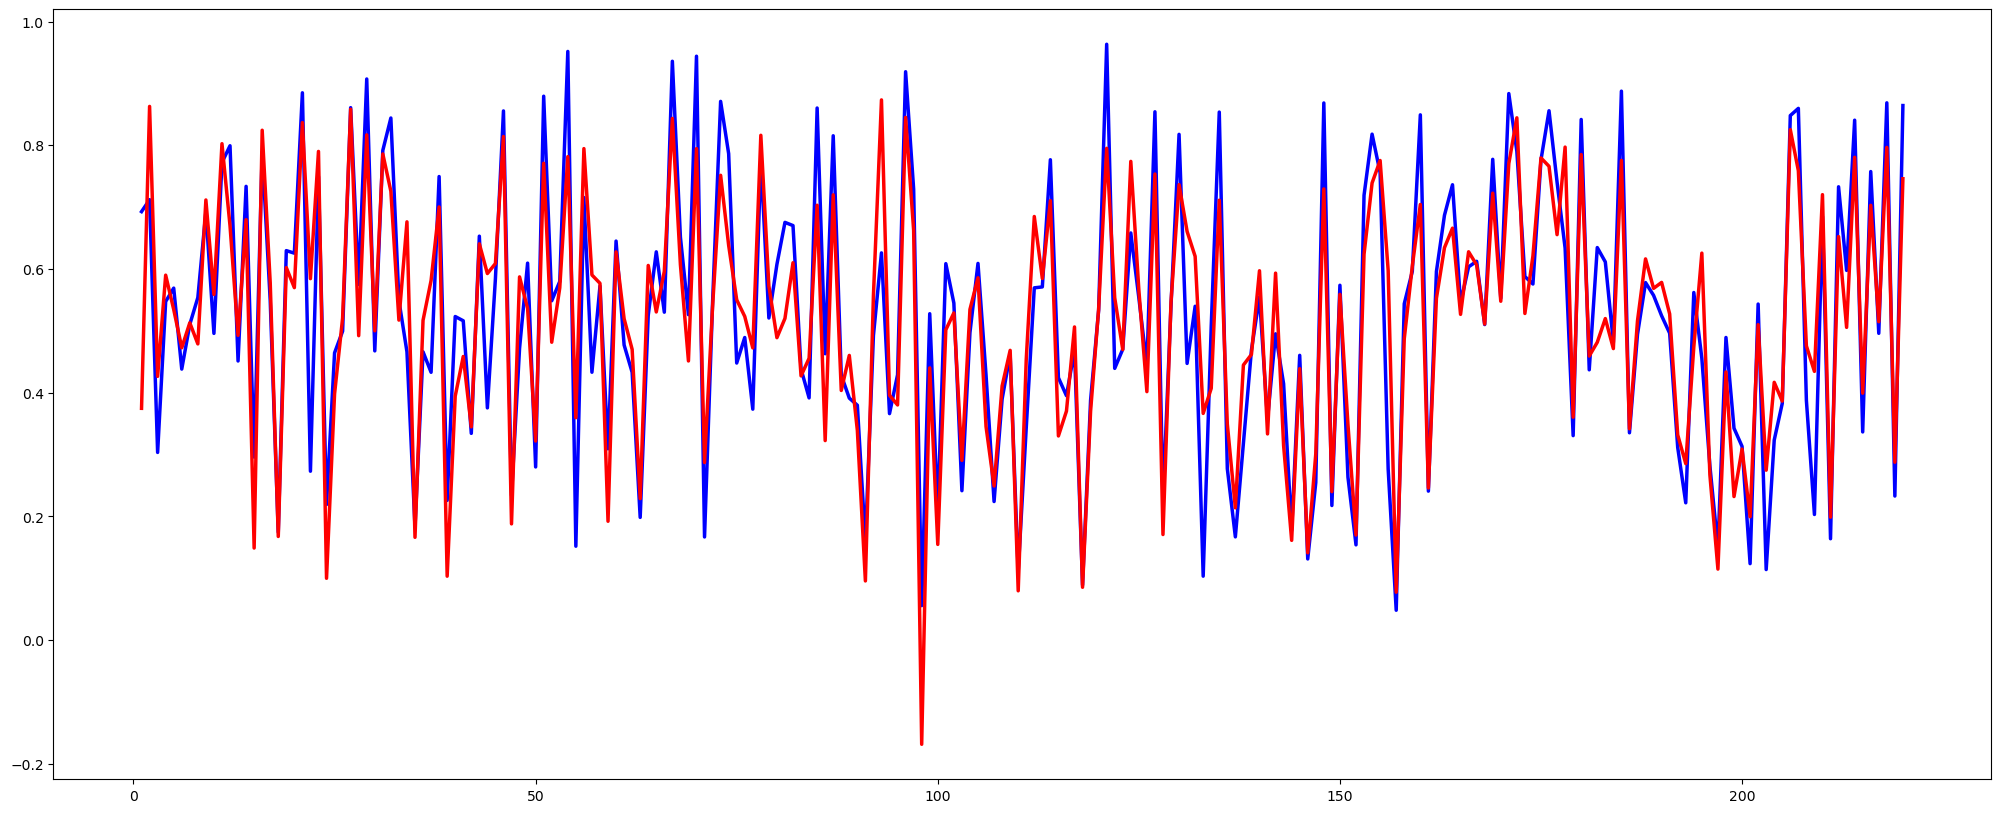

In [49]:
#Plotting y_test and y_pred to understand the spread

c=[i for i in range (1,len(y_test) + 1,1)]
fig=plt.figure(figsize=(25,10) )
plt.plot(c, y_test, color='blue', label='Actual', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred, color='red', label='Predicted',linewidth=2.5, linestyle='-')
plt.show()

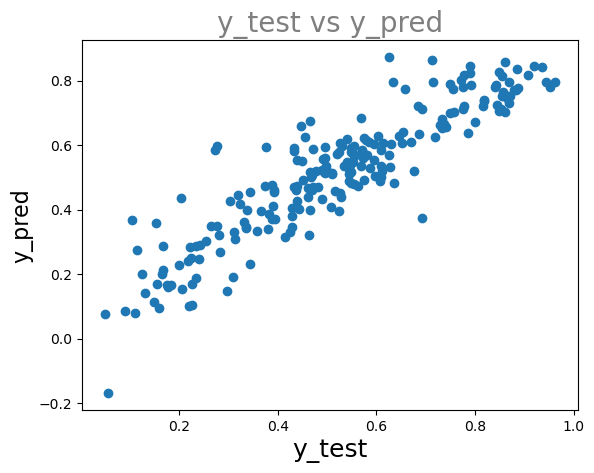

In [51]:
# Scatter plot between y_pred and y_test
plt.figure()
plt.scatter(y_test, y_pred)
plt.title('y_test vs y_pred', fontsize=20, alpha=0.5)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()